In [1]:
%matplotlib inline
import pandas as pd
import pymc3 as pm
import numpy as np


In [4]:
data = pd.read_csv('data/radon.csv')
county_names = data.county.unique()
county_idx = data['county_code'].values

In [7]:
data[['county', 'log_radon', 'floor']].head()

,county,log_radon,floor
0,AITKIN,0.832909,1.0
1,AITKIN,0.832909,0.0
2,AITKIN,1.098612,0.0
3,AITKIN,0.095310,0.0
4,ANOKA,1.163151,0.0


In [9]:
data.floor.unique()

array([ 1.,  0.])

In [20]:
with pm.Model() as hier_model:
    #mu, sd for intercept
    mu_intercept = pm.Normal('mu_intercept', mu=0., sd=10.)
    sd_intercept = pm.HalfNormal('sd_intercept', sd=10.)
    
    #mu, sd for slope
    mu_slope = pm.Normal('mu_slope', mu=0., sd=10.)
    sd_slope = pm.HalfNormal('sd_slope', sd=50.)
    
    #intercept for each county
    intercepts = pm.Normal('intercepts', mu=mu_intercept, sd=sd_intercept, shape=len(county_names))
    #slope for each county
    slopes = pm.Normal('slopes', mu=mu_slope, sd=sd_slope, shape=len(county_names))
    
    #error
    err = pm.HalfCauchy('err', beta=10)
    
    radon_est = intercepts[county_idx] + slopes[county_idx] * data.floor.values
    
    y_like = pm.Normal('y_like', mu=radon_est, sd=err, observed=data.log_radon)


In [21]:
with hier_model:
    htrace = pm.sample(300)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 800/800 [00:09<00:00, 87.14it/s] 


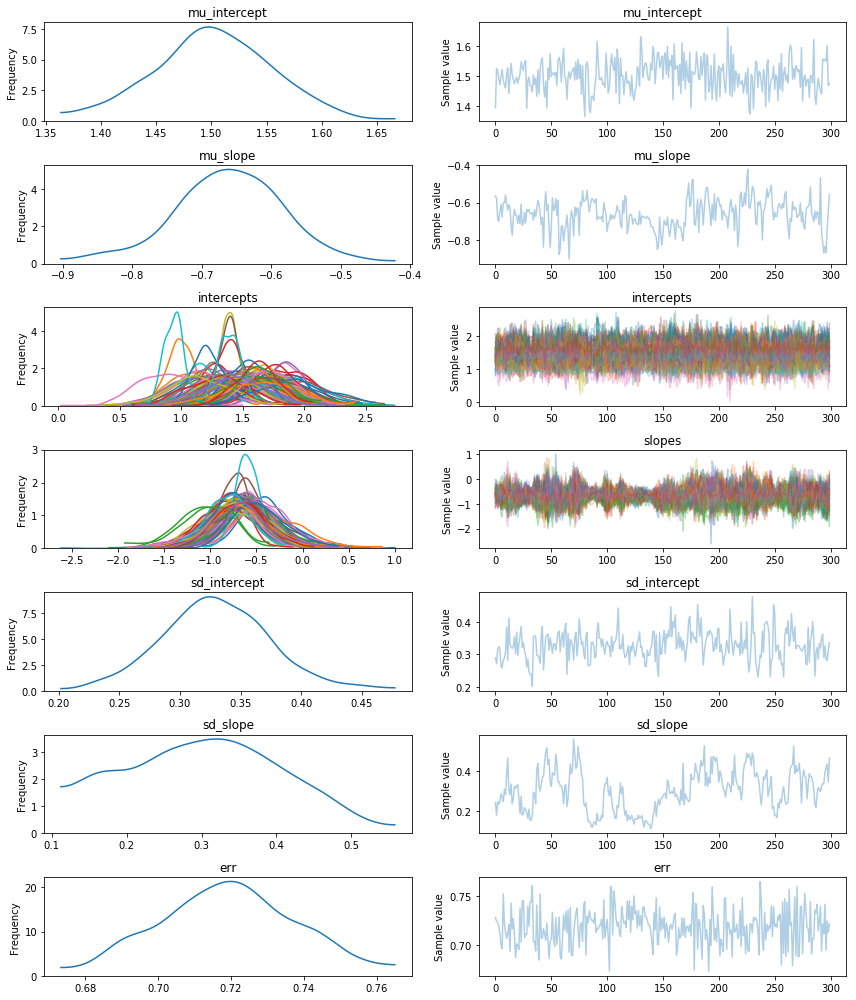

In [22]:
with hier_model:
    pm.traceplot(htrace)

In [26]:
hier_model['intercepts'].mean(axis=0)

mean